In [16]:
from correlate_trump_tweets import correlate

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
ts_data = correlate()

In [6]:
list(ts_data.keys())

['trump', 'clinton', 'metvi_all']

In [7]:
import pandas as pd
ts_all = pd.DataFrame(ts_data)

In [8]:
ts_all.head()

,clinton,metvi_all,trump
2016-09-01,20,0.5,12
2016-09-02,9,1.6,5
2016-09-03,7,1.0,5
2016-09-04,6,0.0,14
2016-09-05,12,1.0,6


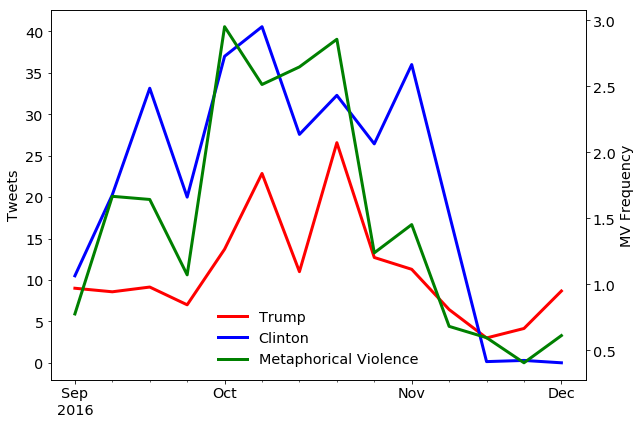

In [25]:
from matplotlib.lines import Line2D

fig, ax1 = plt.subplots(figsize=(9,6))
ax2 = ax1.twinx()
ts_all[['trump', 'clinton']].resample('1w').mean().plot(ax=ax1, color=['r', 'b'], lw=3)
ts_all['metvi_all'].resample('1w').mean().plot(ax=ax2, color='green', label='MetVi', lw=3)

lines = [
    Line2D([0], [0], color='r', lw=3), 
    Line2D([0], [0], color='b', lw=3), 
    Line2D([0], [0], color='g', lw=3)
]
labels = ['Trump', 'Clinton', 'Metaphorical Violence']

ax1.legend(lines, labels, frameon=False)

ax1.set_ylabel('Tweets')
ax2.set_ylabel('MV Frequency');

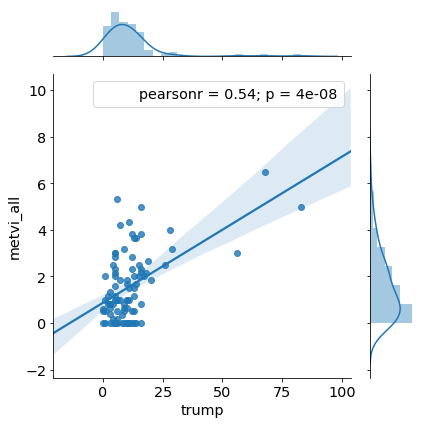

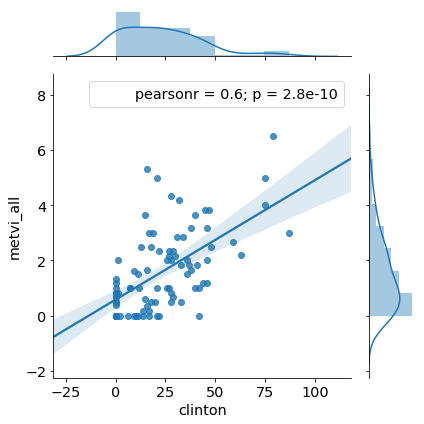

In [30]:
import seaborn as sns

g = sns.jointplot(x='trump', y='metvi_all', data=ts_all, kind='reg')
plt.figure()
gg = sns.jointplot(x='clinton', y='metvi_all', data=ts_all, kind='reg')